# Project: Wrangling and Analyze Data

## Data Gathering


In [70]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline
#Import twitter-archive-enhanced.csv
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')


In [71]:
#Import image_predictions.tsv using requests library
api_url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(api_url)

with open("responses.tsv", "wb") as f:
    f.write(response.content)
predictions=pd.read_csv('responses.tsv',sep='\t')


In [72]:
#Import tweet_json.txt
data=pd.read_json('tweet_json.txt' , lines=True)
tweet_json=data[['id','retweet_count','favorite_count','created_at','full_text']]


## Assessing Data




### Quality issues
1. Timestamp columns has trailing zeros and + symbol in the twitter_archive table

2. Title case in the p1,p2 & p3 columns of the predictions table

3. Title case in the name colulmns of the twitter_archive table

4. Datatype on the timestamp column in the twitter_archive table

5. Datatype on the timestamp column in the retweeted_status_timestamp

6. None values in  the doggo,floofer,pupper,puppo,name columns in the twitter archive table

7. Datatype on the tweet_id column in the twitter_archive table

8. Datatype on the id column in the tweet_json table

9. Datatype on the tweet_id column in the predictions table
10. Duplicate values


### Tidiness issues
1. Twitter_archive,tweet_json and predictions table should be merged into one table

2. Created_column and id redundant in merged Dataframe

## Cleaning Data


In [73]:
# Make copies of original pieces of data
twitter_archive_copy=twitter_archive.copy()
predictions_copy=predictions.copy()
tweet_json_copy=tweet_json.copy()


### twitter_archive : Timestamp columns has trailing zeros and + symbol in the twitter_archive table

#### Define:

Strip the  trailing zeros and + symbol from the timestamps


#### Code

In [74]:
#strip the trailing zeros and + symbol
twitter_archive_copy['timestamp']=twitter_archive_copy['timestamp'].str.strip('0').str.strip('+')
twitter_archive_copy['retweeted_status_timestamp']=twitter_archive_copy['retweeted_status_timestamp'].str.strip('0').str.strip('+')

#### Test

In [75]:
twitter_archive_copy['timestamp'].head()

0    2017-08-01 16:23:56 
1    2017-08-01 00:17:27 
2    2017-07-31 00:18:03 
3    2017-07-30 15:58:51 
4    2017-07-29 16:00:24 
Name: timestamp, dtype: object

### Predictions Table: Title case and underscore in the p1,p2 & p3 columns of the predictions table

#### Define

Remove underscore and change values to Title case

#### Code

In [76]:
#string underscore and trailing whitespace
predictions_copy[['p1','p2','p3']]=predictions_copy[['p1','p2','p3']].apply(lambda x: x.str.title().str.replace('_',' ').str.strip())


#### Test

In [77]:
predictions_copy[['p1','p2','p3']].tail()

,p1,p2,p3
2070,Basset,English Springer,German Short-Haired Pointer
2071,Paper Towel,Labrador Retriever,Spatula
2072,Chihuahua,Malamute,Kelpie
2073,Chihuahua,Pekinese,Papillon
2074,Orange,Bagel,Banana


### twitter_archive Table: Title case in the Name Column

### Define

Change values in the column to Title case

### code

In [78]:
twitter_archive_copy['name']=twitter_archive_copy['name'].apply(lambda x: x.title())

### Test

In [79]:
twitter_archive_copy['name'].tail()

2351    None
2352       A
2353       A
2354       A
2355    None
Name: name, dtype: object

### twitter_archive: Datatype on the timestamp column 

### Define

Change the Column Datatype to datetime from Object Datatype

### Code

In [80]:
twitter_archive_copy['timestamp']=pd.to_datetime(twitter_archive_copy['timestamp'])

### Test

In [81]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### twitter_archive: Datatype on the retweeted_status_timestamp column

### Define

Change the Column Datatype to datetime from Object Datatype

### Code

In [82]:
twitter_archive_copy['retweeted_status_timestamp']=pd.to_datetime(twitter_archive_copy['retweeted_status_timestamp'])


### Test

In [83]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

### twitter_archive:None values in  the doggo,floofer,pupper,puppo,name columns 

### Define

Replace the none values with Null Value

### Code

In [84]:

twitter_archive_copy[['doggo','floofer','pupper','puppo','name']]=twitter_archive_copy[['doggo','floofer','pupper','puppo','name']].replace({'None':np.nan})


### Test

In [85]:
twitter_archive_copy['doggo'].value_counts()

doggo    97
Name: doggo, dtype: int64

In [86]:
twitter_archive_copy['floofer'].value_counts()

floofer    10
Name: floofer, dtype: int64

In [87]:
twitter_archive_copy['name'].value_counts()

A              55
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
The             8
Sadie           8
Bailey          7
An              7
Toby            7
Daisy           7
Buddy           7
Jack            6
Dave            6
Milo            6
Bella           6
Oscar           6
Leo             6
Rusty           6
Jax             6
Stanley         6
Scout           6
Koda            6
Very            5
Sunny           5
               ..
Shakespeare     1
Tayzie          1
Henry           1
Incredibly      1
Saydee          1
Pepper          1
Ivar            1
Chesney         1
Nigel           1
Mason           1
Colin           1
Pilot           1
Skittle         1
Samsom          1
Siba            1
Kendall         1
Goose           1
Hazel           1
Champ           1
Jangle          1
Kanu            1
Darby           1
Alejandro       1
Jeffrie         1
Fabio     

### twitter_archive:Datatype on the tweet_id column 

### Define

Change the column Datatype to Object

### Code

In [88]:
twitter_archive_copy['tweet_id']=twitter_archive_copy['tweet_id'].astype('object')


### Test

In [89]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns]


### tweet_json:Datatype on the id column 

### Define

Change the Datatype to Object

### Code

In [90]:
tweet_json_copy['id']=tweet_json_copy['id'].astype('object')


### Test

In [91]:
tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
id                2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
created_at        2354 non-null datetime64[ns]
full_text         2354 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 92.0+ KB


### Predictions table:Datatype on the tweet id column 

### Define:

Change the Datatype to Object

### Code

In [92]:
predictions_copy['tweet_id']=predictions_copy['tweet_id'].astype('object')

### Test

In [93]:
predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Check for Duplicated Values

### Code

In [94]:
twitter_archive_copy.duplicated().sum()

0

In [95]:
predictions_copy.duplicated().sum()                     

0

In [96]:
tweet_json_copy.duplicated().sum()

0

### Tidiness

### Twitter_archive,tweet_json and predictions table should be merged into one table

### Define

Merge twitter_archive,tweet_json and predictions table into one Dataframe

### Code

In [97]:
twitter_archive_copy_clean=pd.merge(twitter_archive_copy,tweet_json_copy,left_on='tweet_id',right_on='id', how='left')
twitter_master=pd.merge(twitter_archive_copy_clean,predictions_copy,on='tweet_id',how='left')


### Test

In [98]:
twitter_master.shape

(2356, 33)

### Created_column and id redundant in merged Dataframe


### Define

Drop created_at and id columns from merged Dataframe

### Code

In [99]:
twitter_master_clean=twitter_master.drop(['created_at','id'],axis=1)

### Test

In [100]:
twitter_master_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'full_text', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [101]:
twitter_master_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data


### Analysis targets to answer below questions:

a) Do dogs with a name get more reactions from tweeps.

b) Which is the most popular dog growth stage tweeted.

c) Do WeRateDogs tweets get more favorite reactions or retweets.

In [102]:
#Filter data where the name Column is Null
#Calculate mean favourite_count, retweet_count and rating_numerator
twitter_master_clean.loc[twitter_master_clean['name'].isna(),['favorite_count','retweet_count','rating_numerator']].mean()

favorite_count      7236.913978
retweet_count       3224.747312
rating_numerator      15.346309
dtype: float64

In [103]:
#Filter data where name Column is Not null
#Calculate mean favourite_count,retweet_count and rating_numerator
twitter_master_clean.loc[~twitter_master_clean['name'].isna(),['favorite_count','retweet_count','rating_numerator']].mean()

favorite_count      8471.016149
retweet_count       3137.093789
rating_numerator      12.099938
dtype: float64

In [104]:
#Check the different growth stages of dogs in the tweets.
twitter_master_v1=twitter_master_clean.melt(id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','name','retweet_count','favorite_count','full_text','jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],value_vars=['doggo','floofer','pupper','puppo'],var_name='feature',value_name='stage')
twitter_master_v2=twitter_master_v1.drop('feature',axis=1)
twitter_master_v2_stage=twitter_master_v2['stage'].value_counts().to_frame().reset_index().rename({'stage':'count','index':'Growth stage'},axis=1)
twitter_master_v2_stage

,Growth stage,count
0,pupper,257
1,doggo,97
2,puppo,30
3,floofer,10


In [105]:
#Check the dog stage that receive most reactions in tweets.
twitter_master_v3=twitter_master_v2.groupby('stage')['rating_numerator','favorite_count'].mean().astype('int')
twitter_master_v3

,rating_numerator,favorite_count
stage,,
doggo,11,15345
floofer,11,11674
pupper,10,6750
puppo,12,18225


In [106]:
#Check number of tweets where favourite_count is less that retweet count
twitter_master_clean[twitter_master_clean['favorite_count']<twitter_master['retweet_count']].shape

(179, 31)

In [107]:
#Check number of tweets where favourite_count is greater than retweet count
twitter_master_clean[twitter_master_clean['favorite_count']>twitter_master['retweet_count']].shape

(2175, 31)

In [115]:
twitter_master_clean['year']=twitter_master_clean['timestamp'].dt.year
twitter_master_clean.groupby('year')['tweet_id'].count().reset_index().rename({'tweet_id':'count'})

,year,tweet_id
0,2015,690
1,2016,1183
2,2017,483


### Insights:
1. We note that dogs with a name do indeed get more favourite reactions compared to dogs without a name.However, dogs without a name get more retweets compared to those with a name.

2. Pupper dogs get featured more in tweets compared to other dogs.However ,pupper dogs have the lowest average rating and likes.

3. WeRateDogs tweets usually gets more likes compared to retweeets on their tweets.

### Visualization

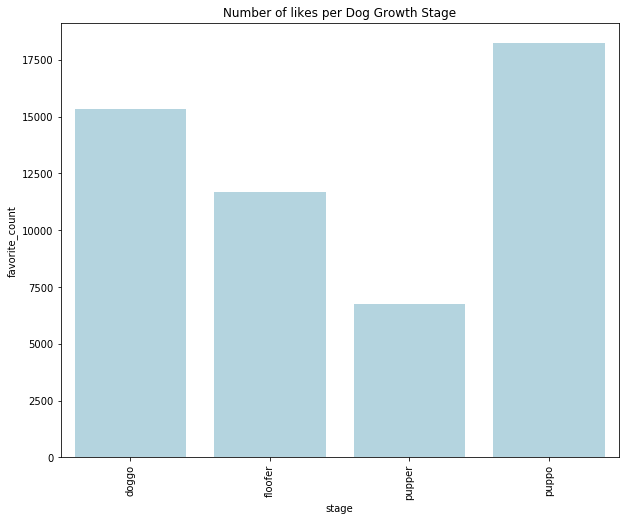

In [108]:
plt.figure(figsize = (10,8))
ax=sns.barplot(data=twitter_master_v3,x=twitter_master_v3.index,y='favorite_count',color='lightblue')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of likes per Dog Growth Stage')
plt.show()

We note that pupper dogs receives  the lowest number of likes while Puppo receives the highest number of likes

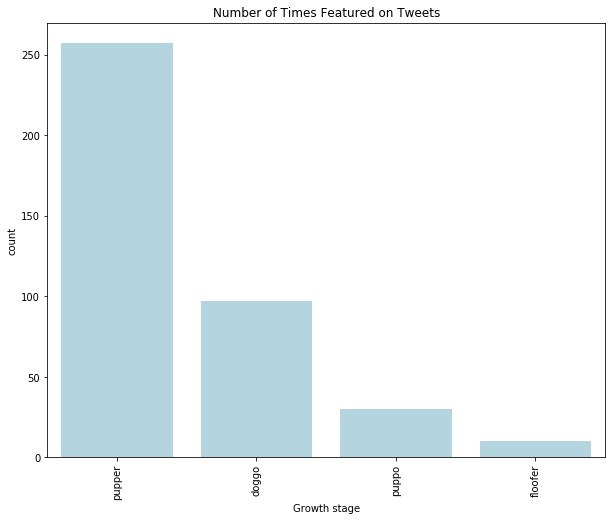

In [109]:
plt.figure(figsize = (10,8))
ax=sns.barplot(data=twitter_master_v2_stage,x='Growth stage',y='count',color='lightblue')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Times Featured on Tweets')
plt.show()
